import time
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats 

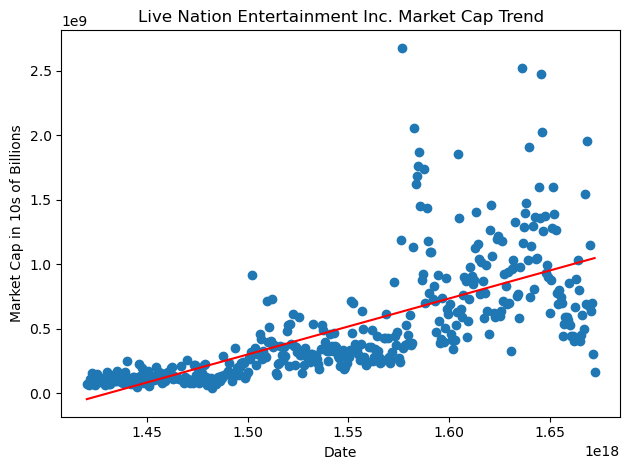

In [26]:
LYV = "LYV"
precovid = int(time.mktime(datetime.datetime(2015, 1, 1, 23, 59).timetuple()))
postcovid = int(time.mktime(datetime.datetime(2023, 1, 1, 23, 59).timetuple()))
interval = "1wk"

query_string = f"https://query1.finance.yahoo.com/v7/finance/download/{LYV}?period1={precovid}&period2={postcovid}&interval={interval}&events=history&includeAdjustedClose=true"

LYV = pd.read_csv(query_string)

# Calculate Market Cap
LYV['Market Cap'] = LYV['Close'].astype(float) * LYV['Volume'].astype(float)

# Convert Date to datetime format and then to int64 for plotting
LYV['Date'] = pd.to_datetime(LYV['Date']).astype(np.int64)

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(LYV['Date'].values, LYV['Market Cap'].values)
regress_values = LYV['Date'] * slope + intercept

# Plotting
plt.scatter(LYV['Date'], LYV['Market Cap'])
plt.plot(LYV['Date'], regress_values, color='r')
plt.xlabel('Date')
plt.ylabel('Market Cap in 10s of Billions')
plt.title('Live Nation Entertainment Inc. Market Cap Trend')
#equation = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
#corr = f"Correlation (r): {rvalue:.2f}"
#plt.annotate(equation, xy=(LYV['Date'].min(), LYV['Market Cap'].max()), xycoords='data', xytext=(20, -30),
             #textcoords='offset points', arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))
#plt.annotate(corr, xy=(LYV['Date'].min(), LYV['Market Cap'].max()), xycoords='data', xytext=(20, -50),
             #textcoords='offset points', arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))
plt.tight_layout()
plt.show()

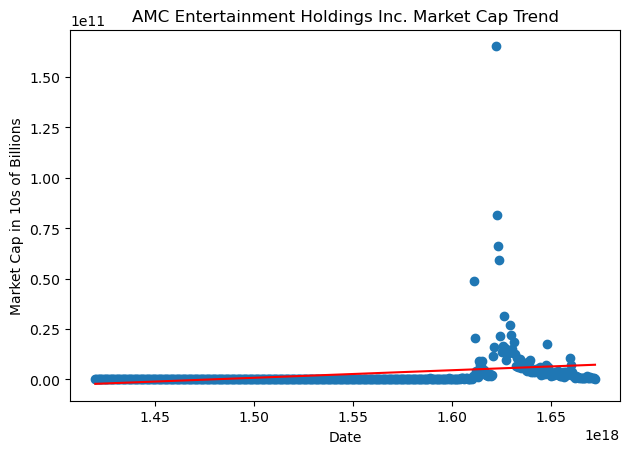

In [27]:
# Define the new ticker symbol
AMC = "AMC"

# Calculate UNIX timestamps for pre-covid and post-covid dates
precovid = int(time.mktime(datetime.datetime(2015, 1, 1, 23, 59).timetuple()))
postcovid = int(time.mktime(datetime.datetime(2023, 1, 1, 23, 59).timetuple()))

# Set the desired interval for data (e.g., 1 week)
interval = "1wk"

# Construct the query URL to fetch historical stock price data for AMC
query_string = f"https://query1.finance.yahoo.com/v7/finance/download/{AMC}?period1={precovid}&period2={postcovid}&interval={interval}&events=history&includeAdjustedClose=true"

# Fetch the data using pandas
amc = pd.read_csv(query_string)

# Calculate Market Cap
amc['Market Cap'] = amc['Close'].astype(float) * amc['Volume'].astype(float)

# Convert Date to datetime format and then to int64 for plotting
amc['Date'] = pd.to_datetime(amc['Date']).astype(np.int64)

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(amc['Date'].values, amc['Market Cap'].values)
regress_values = amc['Date'] * slope + intercept

# Plotting
plt.scatter(amc['Date'], amc['Market Cap'])
plt.plot(amc['Date'], regress_values, color='r')
plt.xlabel('Date')
plt.ylabel('Market Cap in 10s of Billions')
plt.title('AMC Entertainment Holdings Inc. Market Cap Trend')
#equation = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
#corr = f"Correlation (r): {rvalue:.2f}"
#plt.annotate(equation, xy=(amc['Date'].min(), amc['Market Cap'].max()), xycoords='data', xytext=(20, -30),
            # textcoords='offset points', arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))
#plt.annotate(corr, xy=(amc['Date'].min(), amc['Market Cap'].max()), xycoords='data', xytext=(20, -50),
             # textcoords='offset points', arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))
plt.tight_layout()
plt.show()

In [16]:
# Initialize a list of tickers for the ETFs
tickers = ["LYV", "AMC"]

# Initialize an empty list to store the dataframes for each ETF
dfs = []

# Fetch the data for each ETF and store it in the dfs list
for ticker in tickers:
    query_string = f"https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={precovid}&period2={postcovid}&interval={interval}&events=history&includeAdjustedClose=true"
    df = pd.read_csv(query_string)
    df['Ticker'] = ticker  # Add a new column to store the ETF ticker symbol
    df['Date'] = pd.to_datetime(df['Date'])  # Convert Date to datetime format
    dfs.append(df)

# Concatenate all the dataframes in the dfs list based on the common "Date" column
combined_df = pd.concat(dfs)

# Calculate Market Cap for each ETF
combined_df['Market Cap'] = combined_df['Close'].astype(float) * combined_df['Volume'].astype(float)

# Rearrange columns with "Ticker" as the first column
combined_df = combined_df[['Ticker'] + [col for col in combined_df.columns if col != 'Ticker']]

combined_df


,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,Market Cap
0,LYV,2015-01-01,26.219999,26.379999,24.709999,25.110001,25.110001,2973500,7.466459e+07
1,LYV,2015-01-08,25.389999,25.940001,24.440001,24.680000,24.680000,3113900,7.685105e+07
2,LYV,2015-01-15,24.750000,25.120001,24.330000,24.780001,24.780001,2537000,6.286686e+07
3,LYV,2015-01-22,24.950001,25.709999,24.500000,24.549999,24.549999,4677400,1.148302e+08
4,LYV,2015-01-29,24.559999,24.770000,23.530001,24.389999,24.389999,6481700,1.580887e+08
...,...,...,...,...,...,...,...,...,...
413,AMC,2022-12-01,7.290000,9.150000,6.000000,6.050000,6.050000,225210000,1.362520e+09
414,AMC,2022-12-08,6.240000,6.700000,5.530000,5.750000,5.750000,128264900,7.375232e+08
415,AMC,2022-12-15,5.600000,6.050000,4.740000,5.300000,5.300000,129773800,6.878011e+08
416,AMC,2022-12-22,4.140000,4.980000,3.810000,3.840000,3.840000,137193300,5.268223e+08
